Fitted parameters: A = 0.574 ± 0.040, x0 = 74.994 ± 0.050, gamma = 0.736 ± 0.123, C = 0.192 ± 0.032


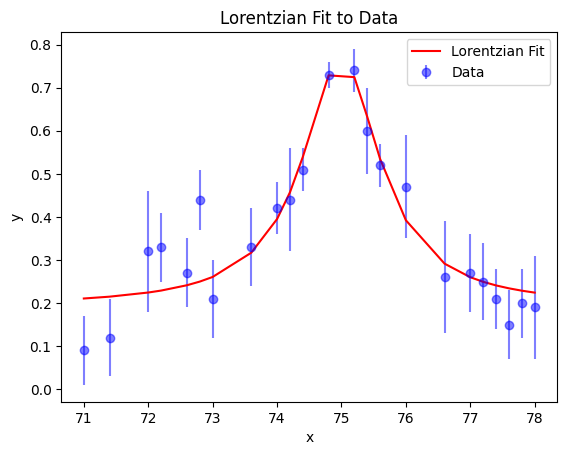

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the Lorentzian function
def lorentzian(x, A, x0, gamma, C):
    return A * gamma**2 / ((x - x0)**2 + gamma**2) + C


xdata = np.array([71,71.4,72,72.2,72.6,72.8,73,73.6,74,74.2,74.4,74.8,75.2,75.4,75.6,76,76.6,77,77.2,77.4,77.6,77.8,78])
errors_x = 2*np.ones(len(xdata))
ydata = np.array([0.09,0.12,0.32,0.33,0.27,0.44,0.21,0.33,0.42,0.44,0.51,0.73,0.74,0.60,0.52,0.47,0.26,0.27,0.25,0.21,0.15,0.20,0.19])
errors = np.array([0.08,0.09,0.14,0.08,0.08,0.07,0.09,0.09,0.06,0.12,0.05,0.03,0.05,0.1,0.05,0.12,0.13,0.09,0.09,0.07,0.08,0.08,0.12])
# Generate synthetic data
# np.random.seed(42)
# x_data = np.linspace(-10, 10, 100)
# A_true = 5  # Peak amplitude
# x0_true = 0  # Center of the peak
# gamma_true = 2  # Half-width at half-maximum (HWHM)
# C_true = 1  # Baseline offset
# y_data = lorentzian(x_data, A_true, x0_true, gamma_true, C_true)
# y_data += 0.2 * np.random.normal(size=x_data.size)  # Adding noise

# Fit the data using curve_fit
initial_guess = [1, 74.5, 1.64, 0.1]  # Initial parameter estimates
params, covariance = curve_fit(lorentzian, xdata, ydata, p0=initial_guess,sigma=errors,absolute_sigma=True)

# Extract fitted parameters
# A_fit, x0_fit, gamma_fit, C_fit = params
# print(f"Fitted parameters: A = {A_fit:.3f}, x0 = {x0_fit:.3f}, gamma = {gamma_fit:.3f}, C = {C_fit:.3f}")

A_fit, x0_fit, gamma_fit, C_fit = params
errors_fit = np.sqrt(np.diag(covariance))
A_err, x0_err, gamma_err, C_err = errors_fit

print(f"Fitted parameters: A = {A_fit:.3f} ± {A_err:.3f}, x0 = {x0_fit:.3f} ± {x0_err:.3f}, gamma = {gamma_fit:.3f} ± {gamma_err:.3f}, C = {C_fit:.3f} ± {C_err:.3f}")
# Generate fitted curve
y_fit = lorentzian(xdata, A_fit, x0_fit, gamma_fit, C_fit)

# Plot the results

plt.errorbar(xdata, ydata, yerr=errors, fmt="o", label="Data", color="blue", alpha=0.5)
plt.plot(xdata, y_fit, label="Lorentzian Fit", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Lorentzian Fit to Data")
plt.show()


In [ ]:
d = [624,647,616,679,554,534,524,471]
e = [490,484,499,501,505,424,366,508]
a = np.average(d)
b = np.average(e)
sigma_a = np.std(d)
sigma_b = np.std(e)
# print(a)
# print(b)
# print(a-b)
sigma_R = np.sqrt((b / a**2 * sigma_a) ** 2 + (1 / a * sigma_b) ** 2)
print(sigma_R)
(a-b)/a

0.12360495991685494


0.1875672187567219

Fitted parameters: A = 0.574 ± 0.040, x0 = 74.994 ± 0.050, gamma = 0.736 ± 0.123, C = 0.192 ± 0.032


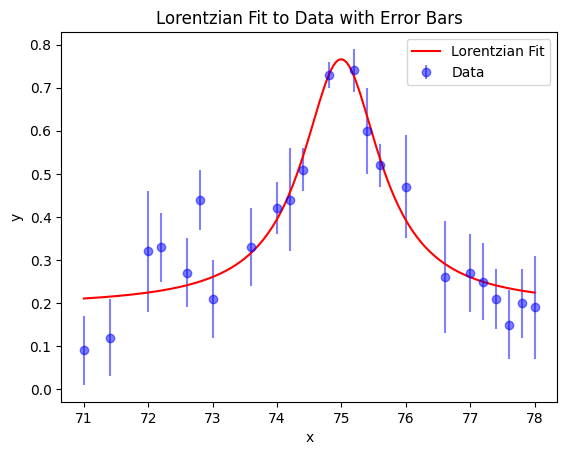

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the Lorentzian function
def lorentzian(x, A, x0, gamma, C):
    return A * gamma**2 / ((x - x0)**2 + gamma**2) + C

# Experimental data
x_data = np.array([71,71.4,72,72.2,72.6,72.8,73,73.6,74,74.2,74.4,74.8,75.2,75.4,75.6,76,76.6,77,77.2,77.4,77.6,77.8,78])
errors_x = 2*np.ones(len(x_data))
y_data = np.array([0.09,0.12,0.32,0.33,0.27,0.44,0.21,0.33,0.42,0.44,0.51,0.73,0.74,0.60,0.52,0.47,0.26,0.27,0.25,0.21,0.15,0.20,0.19])
errors = np.array([0.08,0.09,0.14,0.08,0.08,0.07,0.09,0.09,0.06,0.12,0.05,0.03,0.05,0.1,0.05,0.12,0.13,0.09,0.09,0.07,0.08,0.08,0.12])

# Fit the data using curve_fit
initial_guess = [1, 74.5, 1.64, 0.1]  # Initial parameter estimates
params, covariance = curve_fit(lorentzian, x_data, y_data, sigma=errors, absolute_sigma=True, p0=initial_guess)

# Extract fitted parameters and their errors
A_fit, x0_fit, gamma_fit, C_fit = params
errors_fit = np.sqrt(np.diag(covariance))
A_err, x0_err, gamma_err, C_err = errors_fit

print(f"Fitted parameters: A = {A_fit:.3f} ± {A_err:.3f}, x0 = {x0_fit:.3f} ± {x0_err:.3f}, gamma = {gamma_fit:.3f} ± {gamma_err:.3f}, C = {C_fit:.3f} ± {C_err:.3f}")

# Generate a smooth fitted curve for better visualization
x_smooth = np.linspace(min(x_data), max(x_data), 200)  # More points for smoothness
y_fit_smooth = lorentzian(x_smooth, A_fit, x0_fit, gamma_fit, C_fit)

# Plot the results
plt.errorbar(x_data, y_data, yerr=errors, fmt="o", label="Data", color="blue", alpha=0.5)
plt.plot(x_smooth, y_fit_smooth, label="Lorentzian Fit", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Lorentzian Fit to Data with Error Bars")
plt.show()

Fitted parameters:
Amplitude: 10.0701 ± 0.1447
Center: 5.0097 ± 0.0231
Width: 0.9802 ± 0.0228

True parameters:
Amplitude: 10.0000
Center: 5.0000
Width: 1.0000


ValueError: 'yerr' must not contain negative values

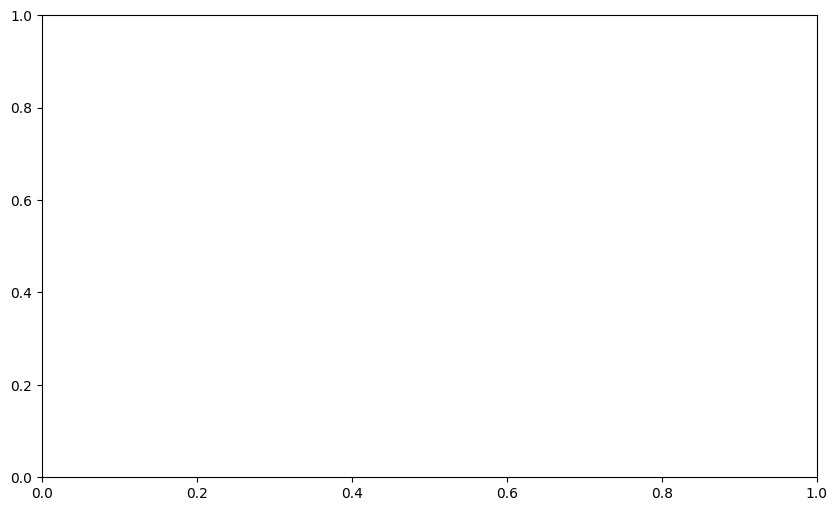

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.odr import ODR, Model, RealData

# Define the Lorentzian function
def lorentzian(x, amplitude, center, width):
    """
    Lorentzian function

    Parameters:
    - x: Independent variable
    - amplitude: Peak amplitude
    - center: Peak center position
    - width: Peak full width at half maximum (FWHM)

    Returns:
    - y: Lorentzian function value
    """
    return amplitude * (width**2 / ((x - center)**2 + width**2))

# Function for scipy.odr (Orthogonal Distance Regression)
def lorentzian_odr(params, x):
    amplitude, center, width = params
    return amplitude * (width**2 / ((x - center)**2 + width**2))

# Generate some sample data with errors in both x and y
def generate_sample_data(n_points=50, noise_level=0.1):
    true_amplitude = 10.0
    true_center = 5.0
    true_width = 1.0

    # Generate x values with some noise
    x_true = np.linspace(1, 9, n_points)
    x_errors = np.random.normal(0, noise_level, n_points)
    x_observed = x_true + x_errors

    # Generate y values with some noise
    y_true = lorentzian(x_true, true_amplitude, true_center, true_width)
    y_errors = np.random.normal(0, noise_level * np.max(y_true), n_points)
    y_observed = y_true + y_errors

    return x_observed, y_observed, x_errors, y_errors, true_amplitude, true_center, true_width

# Main function to fit the data
def fit_lorentzian_with_errors(x, y, x_err, y_err):
    """
    Fit a Lorentzian to data with errors in both x and y.

    Parameters:
    - x: x data points
    - y: y data points
    - x_err: errors in x
    - y_err: errors in y

    Returns:
    - params: Fitted parameters [amplitude, center, width]
    - errors: Errors in the fitted parameters
    """
    # Initial parameter guess (amplitude, center, width)
    p0 = [np.max(y), x[np.argmax(y)], 1.0]

    # First fit using curve_fit (only considers y errors)
    if y_err is not None:
        popt, pcov = curve_fit(lorentzian, x, y, p0=p0, sigma=y_err, absolute_sigma=True)
    else:
        popt, pcov = curve_fit(lorentzian, x, y, p0=p0)

    perr_curve_fit = np.sqrt(np.diag(pcov))

    # If we have errors in x, use Orthogonal Distance Regression
    if x_err is not None:
        # Create a model for ODR
        lorentzian_model = Model(lorentzian_odr)

        # Create a RealData object
        data = RealData(x, y, sx=x_err, sy=y_err)

        # Set up ODR with the model and data
        odr = ODR(data, lorentzian_model, beta0=popt)

        # Run the regression
        output = odr.run()

        # Extract the parameters and errors from the output
        popt_odr = output.beta
        perr_odr = output.sd_beta

        return popt_odr, perr_odr
    else:
        return popt, perr_curve_fit

# Example usage
if __name__ == "__main__":
    # Generate sample data or load your own data here
    x, y, x_err, y_err, true_amplitude, true_center, true_width = generate_sample_data()

    # Fit the data
    params, errors = fit_lorentzian_with_errors(x, y, x_err, y_err)

    # Print the fitted parameters
    print("Fitted parameters:")
    print(f"Amplitude: {params[0]:.4f} ± {errors[0]:.4f}")
    print(f"Center: {params[1]:.4f} ± {errors[1]:.4f}")
    print(f"Width: {params[2]:.4f} ± {errors[2]:.4f}")

    # Print the true parameters
    print("\nTrue parameters:")
    print(f"Amplitude: {true_amplitude:.4f}")
    print(f"Center: {true_center:.4f}")
    print(f"Width: {true_width:.4f}")

    # Create a plot to visualize the fit
    plt.figure(figsize=(10, 6))

    # Plot the data points with error bars
    plt.errorbar(x, y, yerr=y_err, fmt="o", label='Data with errors')

    # Plot the fitted curve
    x_fit = np.linspace(min(x), max(x), 1000)
    y_fit = lorentzian(x_fit, *params)
    plt.plot(x_fit, y_fit, 'r-', label='Fitted Lorentzian')

    # Add labels and legend
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Lorentzian Fit with Errors in X and Y')
    plt.legend()
    plt.grid(True)

    plt.show()

    # To use with your own data, replace the sample data generation with:
    # x = np.array([...])  # Your x data
    # y = np.array([...])  # Your y data
    # x_err = np.array([...])  # Your x errors
    # y_err = np.array([...])  # Your y errors
    # params, errors = fit_lorentzian_with_errors(x, y, x_err, y_err)

In [ ]:
x, y, x_err, y_err, true_amplitude, true_center, true_width = generate_sample_data()
np.shape(y_err)


(50,)